In [1]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')

# Infinite row of vortices

### Task

You will place $N$ vortices aligned on the horizontal axis and visualize the flow pattern. Do the following:

* Using the equations derived above, compute the velocity components of each vortex on a mesh grid.

* Remember that a finite number of vortices can be represented by a list or a NumPy array. Think and decide which one to use.

* Define functions to avoid code repetition (and why not classes, if you prefer and are familiar with the concept).

* Once you have all the velocities, apply the principle of superposition and plot the resulting flow pattern.

* Play around with the size of your vortex row and the plotting range. Make your plot of publishable quality!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# embed the figures into the notebook
%matplotlib inline

The most convenient approach to address the problem is to create a class of vortex containing the center coordinates, strength and of course velocities and streamfunction

In [3]:
# Class for vortex
class Vortex:

    # The init method or constructor
    def __init__(self, Gamma, x0, y0, X, Y):

        # Attributes
        self.x0 = x0
        self.y0 = y0
        self.Gamma = Gamma
        self.psi = +Gamma/(4*np.pi)*np.log(np.sqrt((X - x0)**2 + (Y - y0)**2))
        self.phi = -Gamma/(4*np.pi)*np.arctan2((Y - y0), (X - x0))
        self.u = +Gamma/(2*np.pi)*(Y - y0)/((X - x0)**2 + (Y - y0)**2)
        self.v = -Gamma/(2*np.pi)*(X - x0)/((X - x0)**2 + (Y - y0)**2)
     

In [4]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -0.5, 0.5            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)             # generates a mesh grid

Now, a list of vortex objects will be created and initialize from its center coordinates, strength and the flow field coordinates

In [5]:
M = 198
Gamma = 5
x_row = np.linspace(-32, 32, M)
vortices = [Vortex(Gamma, xx, 0, X, Y) for xx in x_row]

Because each vortex is now an object, the access to $psi$, and $u$, $v$ of each is pretty straightforward, and so on their sum (superposition)

In [6]:
psi = np.zeros((N, N), dtype=float)
phi = np.zeros((N, N), dtype=float)
u = np.zeros((N, N), dtype=float)
v = np.zeros((N, N), dtype=float)

for obj in vortices:
    psi += obj.psi
    phi += obj.phi
    u += obj.u
    v += obj.v

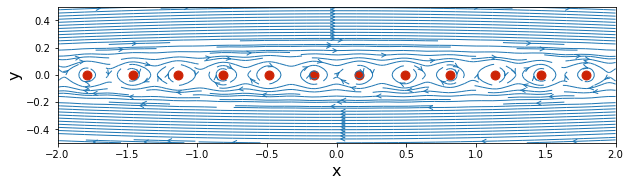

In [7]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=1.5, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_row, x_row*0, color='#CD2305', s=80, marker='o');

It is noticed that when the row of vortices is extended, the streamlines become more horizontal in the freestream region.

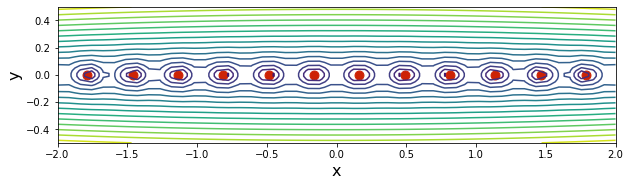

In [8]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.contour(X, Y, psi, levels=16)
plt.scatter(x_row, x_row*0, color='#CD2305', s=80, marker='o');

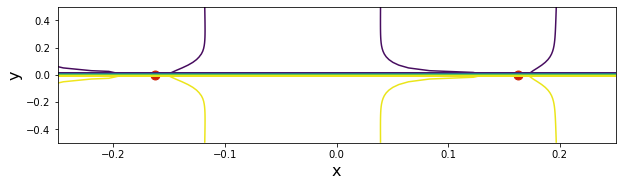

In [9]:
# plot the potential
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start/8, x_end/8)
plt.ylim(y_start, y_end)
plt.contour(X, Y, phi, levels=512)
plt.scatter(x_row, x_row*0, color='#CD2305', s=80, marker='o');

## Infinite row of vortices

To derive the closed-form functions, we use the complex representation:

$$z = x+jy$$

where $j = \sqrt{−1}$ (We don't use $i$ to not confuse it with our indices!)

On the other hand, the complex potential is defined as

$$w = \phi + j\psi,$$

being $\phi$ the velocity potential and $\psi$ the streamfunction. By differentiation with respect to the complez variable $z$ one gets

$$\frac{dw}{dz} = u - jv,$$

where $u$ and $v$ are the Cartesian velocities.

This can be easily solved by applying the chain rule. First let's do this way:

$$\frac{dw}{dz} = \frac{d\phi}{dz} + j \frac{d\psi}{dz} = \frac{\partial \phi}{\partial x} \frac{\partial x}{\partial z} + j \frac{\partial \psi}{\partial x} \frac{\partial x}{\partial z}$$

By identifying ${\partial \phi}/{\partial x} = u$ and $j{\partial \psi}/{\partial x} = -jv$, one reaches the velocity potential defined previously.

This has also to be satisfied the other way around (by applying the chain rule along $y$-direction),

$$\frac{dw}{dz} = \frac{d\phi}{dz} + j \frac{d\psi}{dz} = \frac{\partial \phi}{\partial y} \frac{\partial y}{\partial z} + j \frac{\partial \psi}{\partial y} \frac{\partial y}{\partial z},$$

being now recognized $\frac{\partial \phi}{\partial y} = v$ and $\frac{\partial \psi}{\partial y} = u$.

On the other hand, by taking into account that

$$\log(r\,e^{j \theta}) = \log{r} + j\theta,$$

one can express the complex potential for a vortex as

$$w = \frac{j\Gamma}{2\pi} \log{z}.$$

Consider a second vortex located at $\left(a,0\right)$ with the same strength $\Gamma$. Its complex potential is given by

$$w = \frac{j\Gamma}{2\pi}\ln \left(z-a\right)$$
A additional vortex located $a$ further will have a complex potential of the form

$$w = \frac{j\Gamma}{2\pi}\ln \left(z-2a\right)$$
and so on...

Therefore, the complex potential representing an infinite row of vortices (on the line $y=0$) is given by

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty}^{+\infty} \ln \left( z-ma \right)$$

Here, we decide to add a constant (not a random one!). Why not, since the differentiation will give the same results.

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty}^{+\infty} \ln \left( z-ma \right) + \text{constant}$$

where

$$\text{constant} = -\frac{j\Gamma}{2\pi} \sum_{m=-\infty, m\neq 0}^{+\infty} \ln \left( -ma \right)$$

so that, the complex potential can be cast in the following form

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty,m\neq 0}^{+\infty} \ln \left( \frac{z-ma}{-ma} \right) + \frac{j\Gamma}{2\pi}\ln z$$
Now, it is time do some mathematics...

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty,m\neq 0}^{+\infty} \ln \left( 1-\frac{z}{ma} \right) + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi}\sum_{m=1}^{+\infty} \left\lbrace \ln\left(1-\frac{z}{ma}\right) + \ln\left(1+\frac{z}{ma}\right) \right\rbrace + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi}\sum_{m=1}^{+\infty} \ln\left(1-\frac{z^2}{m^2a^2}\right) + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi} \ln\left(\prod_{m=1}^{+\infty}\left(1-\frac{z^2}{m^2a^2}\right)\right) + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi} \ln\left(z\prod_{m=1}^{+\infty}\left(1-\frac{z^2}{m^2a^2}\right)\right)$$

$$w = \frac{j\Gamma}{2\pi} \ln\left(z\prod_{m=1}^{+\infty}\left(1-\frac{\left(\frac{z\pi}{a}\right)^2}{m^2\pi^2}\right)\right)$$

The product is actually the formula for the sine and the complex potential becomes

$$w = \frac{j\Gamma}{2\pi}\ln\left(\sin\left(\frac{z\pi}{a}\right)\right)$$

We derive the complex potential with respect to the complex variable to get the complex velocity

$$\frac{dw}{dz} = u-iv = \frac{j\Gamma}{2a}\cot\left(\frac{z\pi}{a}\right)$$$$u-jv = \frac{j\Gamma}{2a}\frac{\cos\left(\frac{\pi x}{a}+j\frac{\pi y}{a}\right)}{\sin\left(\frac{\pi x}{a}+j\frac{\pi y}{a}\right)}$$

Applying trigonometric identities, we find the following expression

$$u-jv = \frac{j\Gamma}{2a}\frac{\cos\left(\frac{\pi x}{a}\right)\cosh\left(\frac{\pi y}{a}\right) - j\sin\left(\frac{\pi x}{a}\right)\sinh\left(\frac{\pi y}{a}\right)}{\sin\left(\frac{\pi x}{a}\right)\cosh\left(\frac{\pi y}{a}\right) + j\cos\left(\frac{\pi x}{a}\right)\sinh\left(\frac{\pi y}{a}\right)}$$
which can be cast in the form (try it!)

$$u-jv = \frac{\Gamma}{2a}\frac{\sinh\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right) - \cos\left(\frac{2\pi x}{a}\right)} + j \frac{\Gamma}{2a}\frac{\sin\left(\frac{2\pi x}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right) - \cos\left(\frac{2\pi x}{a}\right)}$$
Therefore, the Cartesian velocity components of an infinite row of vortices are given by

$$u\left(x,y\right) = +\frac{\Gamma}{2a}\frac{\sinh\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)}$$$$v\left(x,y\right) = -\frac{\Gamma}{2a}\frac{\sin\left(\frac{2\pi x}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)}$$

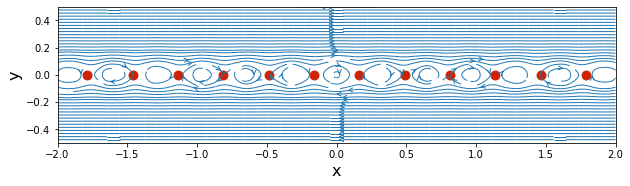

In [14]:
a = 64/200
uu = +Gamma/(2*a)*np.sinh(2*np.pi*Y/a)/(np.cosh(2*np.pi*Y/a) - np.cos(2*np.pi*X/a))
vv = -Gamma/(2*a)*np.sin(2*np.pi*X/a)/(np.cosh(2*np.pi*Y/a) - np.cos(2*np.pi*X/a))

# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, uu, vv,
                  density=1.5, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_row, x_row*0, color='#CD2305', s=80, marker='o');

It is observed with the respect with the plot of the finite row of vortices that in the limit $N \to \infty$, the flow field will remain completely horizontal out of the core. This trend was observed previously when increasing the number of vortices in row, being confirme by the analytical solution.